#Regression

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [3]:
#import dataset
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#Simple Linear Regression

.Two variable

.Both are numeric

In [7]:
X = df[['age']]
y = df['fare']
print(X.shape, y.shape)

(891, 1) (891,)


In [9]:
#null value check karni hai
X.isnull().sum()

age    177
dtype: int64

In [10]:
X.isnull().sum()/len(X)*100  # Total null values in X

age    19.86532
dtype: float64

In [11]:
y.isnull().sum()/len(y)*100  # Total null values in y

np.float64(0.0)

In [12]:
#how to handle null values
#how to handle missing values
X['age'] = X['age'].fillna(X['age'].mean())  # Fill missing values with mean

C:\Users\HKT\AppData\Local\Temp\ipykernel_21976\2772128080.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['age'] = X['age'].fillna(X['age'].mean())  # Fill missing values with mean


In [14]:
X.isnull().sum()  # Check again for null values

age    0
dtype: int64

In [15]:
X.isnull().sum()/len(X)*100  # Check again for null values percentage

age    0.0
dtype: float64

In [16]:
print(X.shape, y.shape)

(891, 1) (891,)


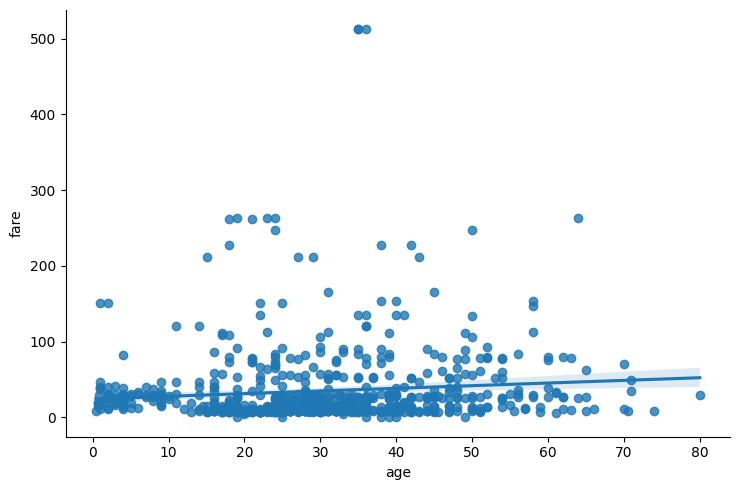

In [17]:
#create a plot
#how to select two columns for plotting
sns.lmplot(x='age', y='fare', data=df, height=5, aspect=1.5)

<Axes: ylabel='age'>

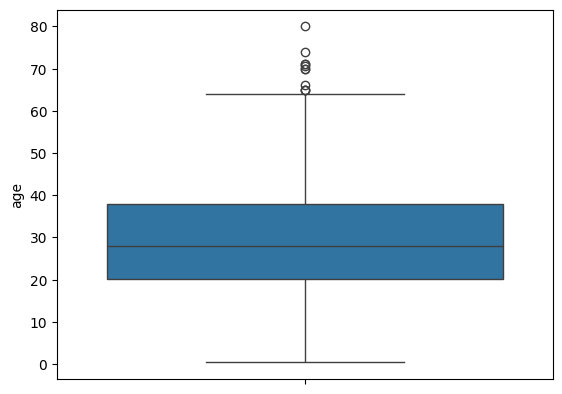

In [20]:
#create a box plot
sns.boxplot( y='age', data=df)

In [21]:
#remove outliers
df = df[df['age'] < 60]  # Remove outliers in 'age' column

<Axes: ylabel='age'>

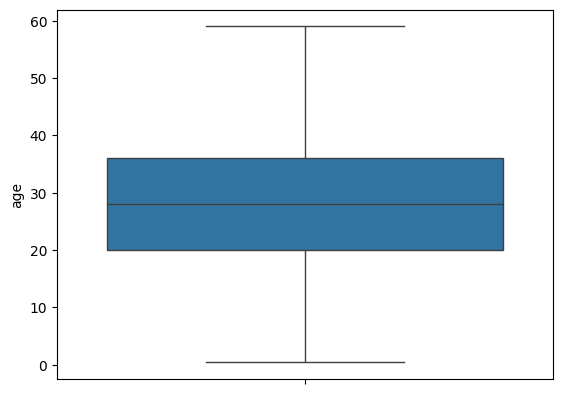

In [22]:
sns.boxplot( y='age', data=df)  # Check box plot again after removing outliers

<Axes: ylabel='fare'>

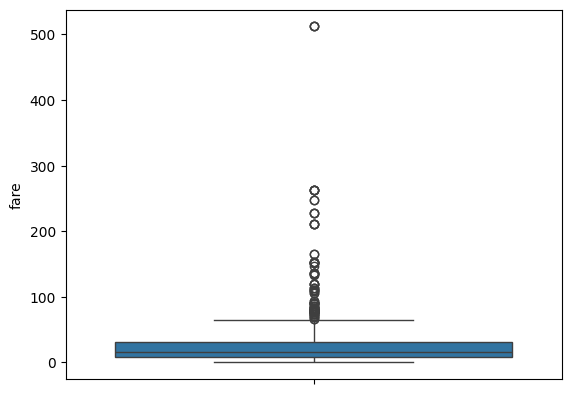

In [23]:
#create a fare box plot
sns.boxplot( y='fare', data=df)

In [27]:
#remove outliers

df = df[df['fare'] < 50]  # Remove outliers in 'fare

<Axes: ylabel='fare'>

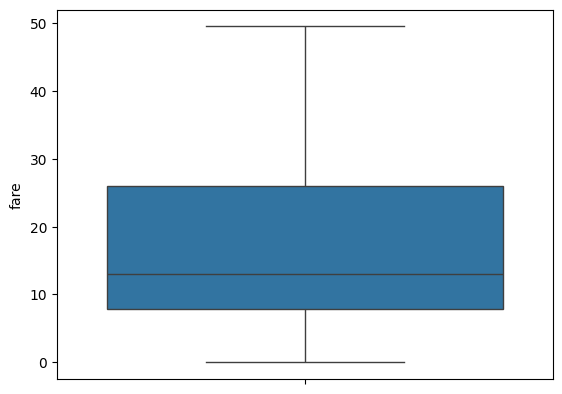

In [28]:
sns.boxplot( y='fare', data=df)  # Check box plot again after removing outliers

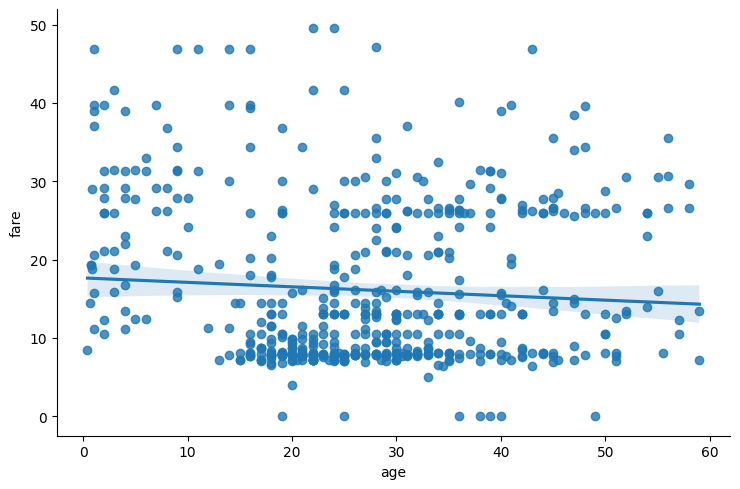

In [29]:
sns.lmplot(x='age', y='fare', data=df, height=5, aspect=1.5)  # Plot after removing outliers

In [30]:
#import scikit-learn libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [40]:
#1 model ko bula ley
model = LinearRegression()
#2 train the model
model.fit(X, y)
#3 predict the model
y_pred = model.predict([[86]]) # Predict fare for age 25
print(f"Predicted fare for age : {y_pred[0]}")

Predicted fare for age : 51.90747204224702


c:\Users\HKT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [42]:
#model ko check karna hai
#model evaluation with metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 1), (179, 1), (712,), (179,))

In [66]:
#model ko bula ley
model = LinearRegression()
#model ko train karna
model.fit(X_train, y_train)
#model ko predict karna
y_pred = model.predict(X_test)
print("y_pred:", y_pred[:5])  # Print first 5 predictions
# print(f"Predicted fare for test data: {y_pred[:5]}")  # Print first 5 predictions

y_pred: [32.64056945 33.07955404 29.36758845 24.64326861 27.34287995]


In [68]:
#model ko bula ley
model = LinearRegression()
#model ko train karna
model.fit(X_train, y_train)
#model ko predict karna
y_pred = model.predict([[35]])
print("y_pred:", y_pred[:5])  # Print first 5 predictions
# print(f"Predicted fare for test data: {y_pred[:5]}")  # Print first 5 predictions

y_pred: [34.42935971]


c:\Users\HKT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<Axes: xlabel='fare'>

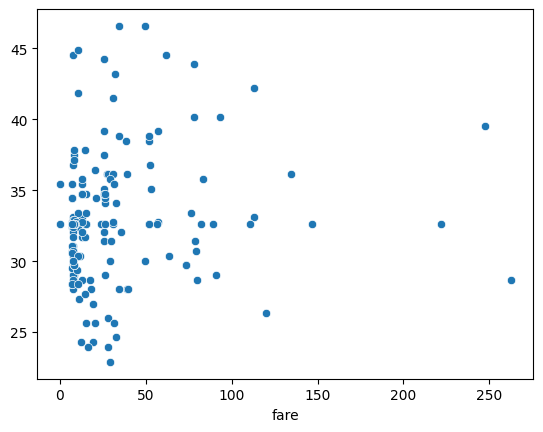

In [47]:
#Compare predicted values with actual values
sns.scatterplot(x=y_test, y=y_pred)
# plt.xlabel('Actual Fare')

In [48]:
model.score(X_test, y_test)  # Model evaluation score

0.0146037912223973

In [49]:
#metric ky bary bat karty ha
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [60]:
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test,y_pred)
# RMSE = mean_squared_error(y_test,y_pred,squared=False)
# RMSE = mean_squared_error(y_test,y_pred,squared=False)
R2 = r2_score(y_test,y_pred)
print(MAE)
print(MSE)
# print("RMSE")
print(R2)

25.456071087078417
1524.8312803377087
0.0146037912223973


In [58]:
import numpy as np
RMSE = np.sqrt(MSE)
RMSE

np.float64(39.04908808586583)